<center><h1>Thergaonkar_Advait_HW1</h1></center>
<center>Name: Advait Thergaonkar</center>
<center>Github Username: advait-t</center>
<center>USC ID: 4057763693</center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Get the Vertebral Column Data Set

In [2]:
df = pd.read_csv('/Users/advait_t/Desktop/DSCI552/PDF New Homework- 8 Sets/Homework 1/Homework 1 Data/vertebral_column_data/column_2C.dat', sep=' ', header=None)
df.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']
df['class_numeric'] = df['class'].map({'NO': 0, 'AB': 1})
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,class_numeric
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB,1
1,39.06,10.06,25.02,29.00,114.41,4.56,AB,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB,1
3,69.30,24.65,44.31,44.64,101.87,11.21,AB,1
4,49.71,9.65,28.32,40.06,108.17,7.92,AB,1


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

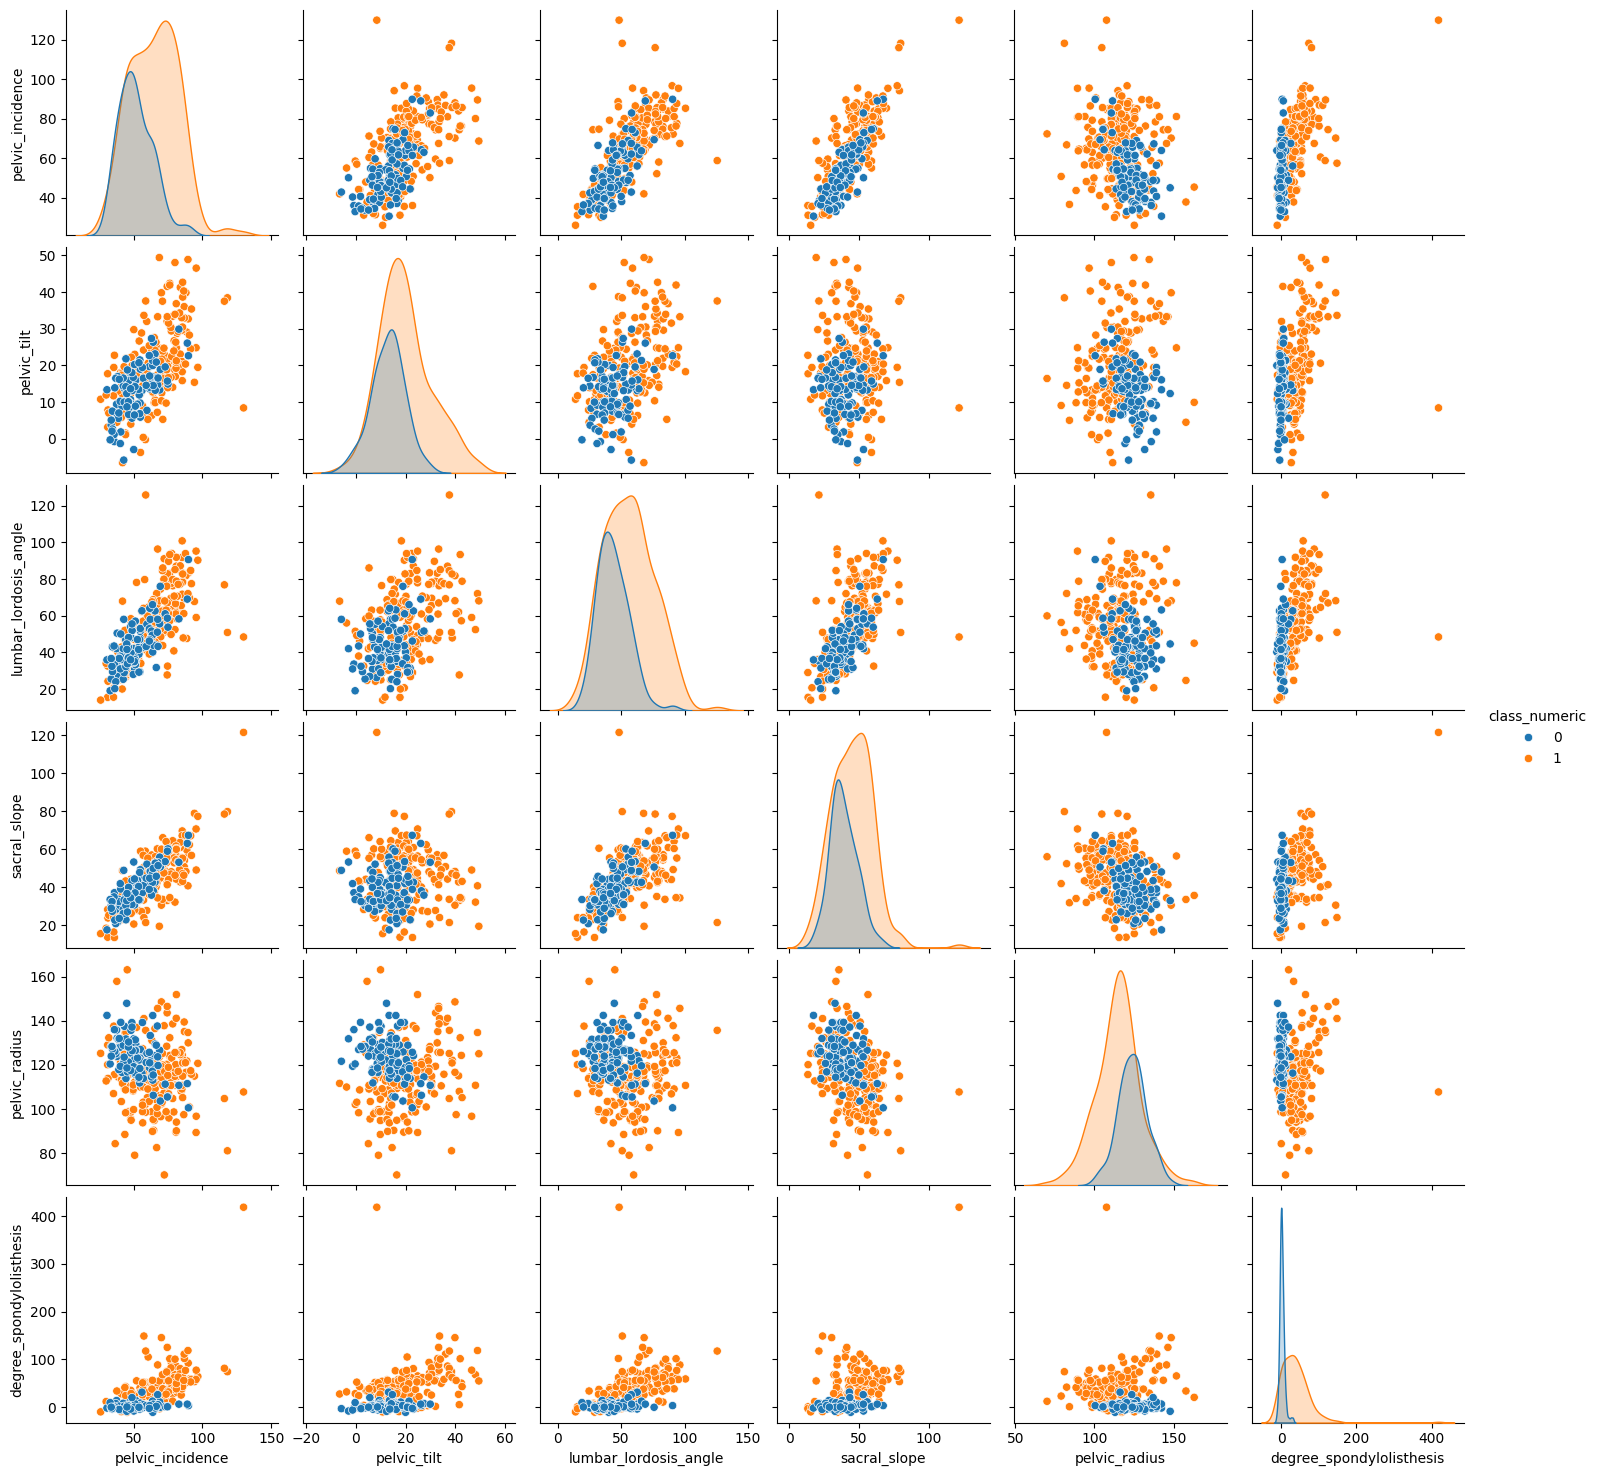

In [3]:
sns.pairplot(df, hue='class_numeric')
plt.show()


#### ii. Boxplots

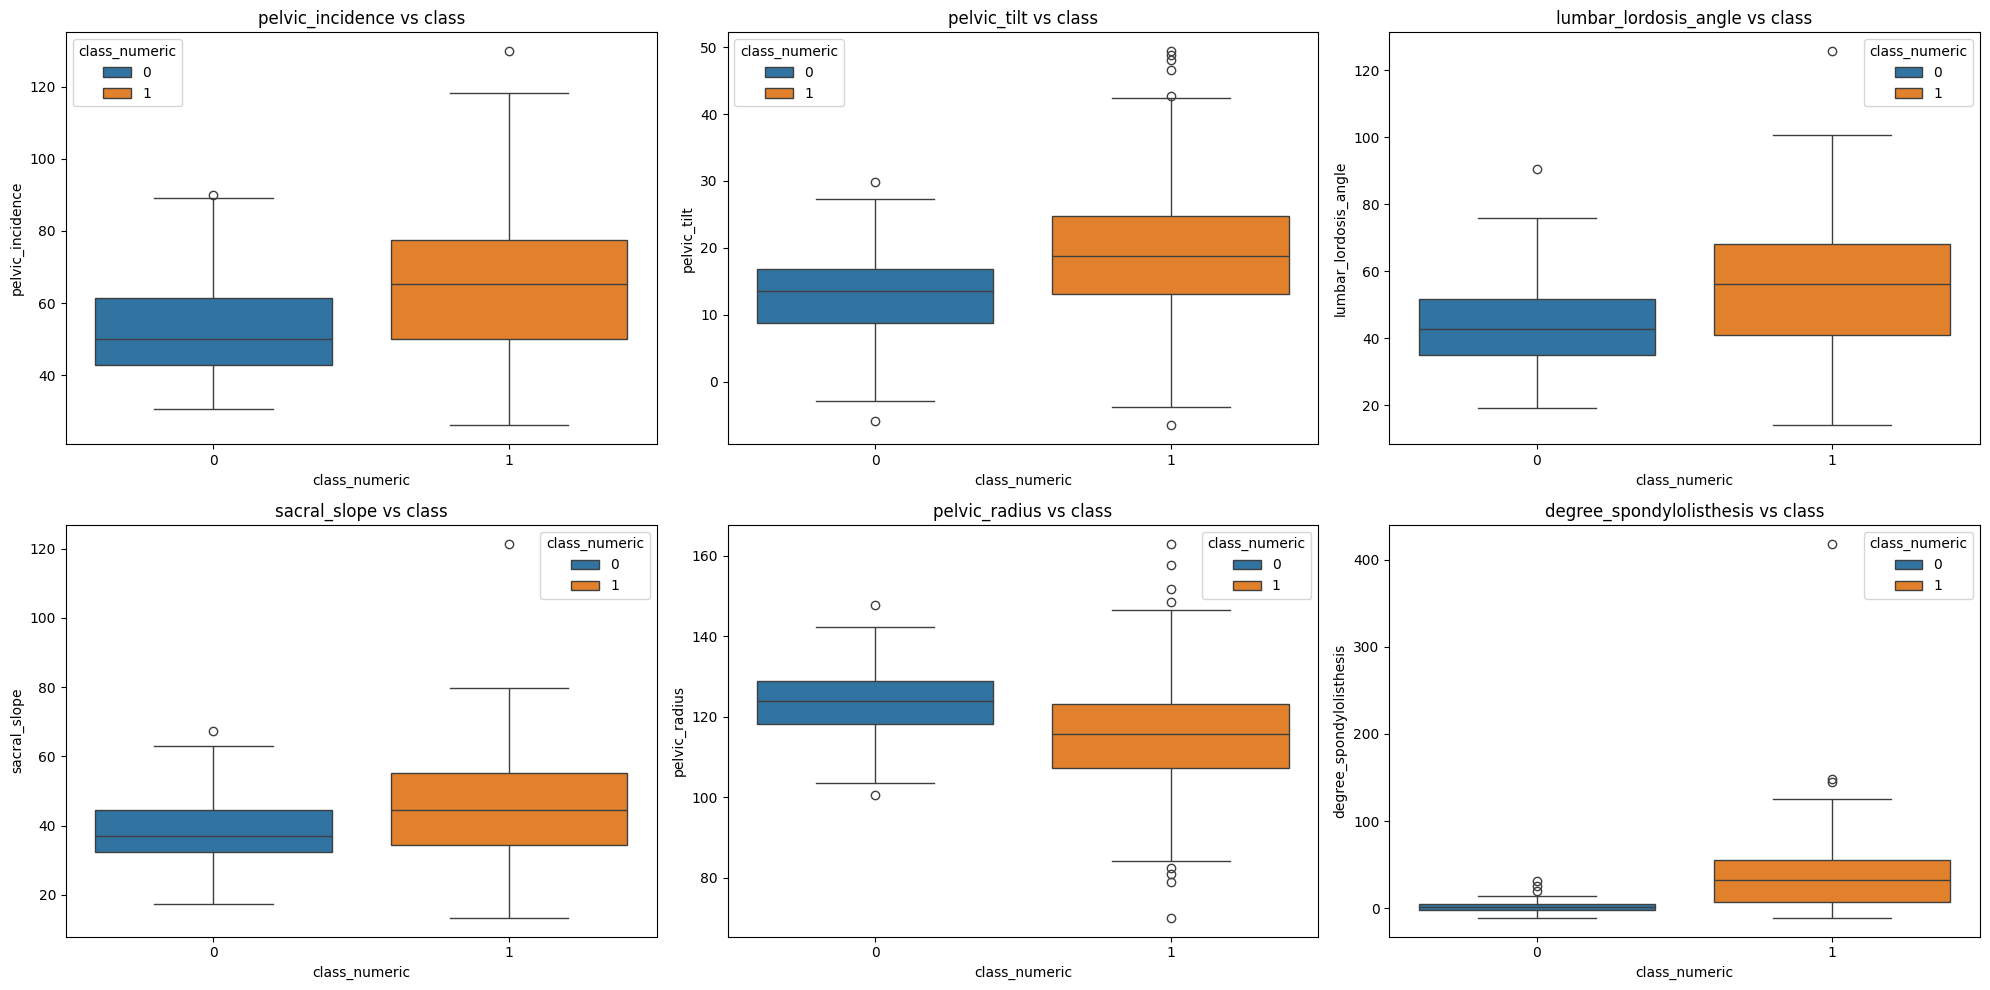

In [4]:
figure, axis = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(df.columns[:-2]):
    sns.boxplot(x='class_numeric', y=col, data=df, ax=axis[i//3, i%3], hue = 'class_numeric')
    axis[i//3, i%3].set_title(f'{col} vs class')
plt.tight_layout()
plt.show()

#### iii. Split Data Set

In [5]:
df_class0 = df[df['class_numeric'] == 0].iloc[:70]
df_class1 = df[df['class_numeric'] == 1].iloc[:140]
df_train = pd.concat([df_class0, df_class1])
df_test = df.drop(df_train.index)

X_train = df_train.drop(['class', 'class_numeric'], axis=1)
y_train = df_train['class_numeric']
X_test = df_test.drop(['class', 'class_numeric'], axis=1)
y_test = df_test['class_numeric']
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(210, 6) (210,) (100, 6) (100,)


### (c) Classification

#### i. Euclidean Metric

In [6]:
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.94


#### ii. Test Data

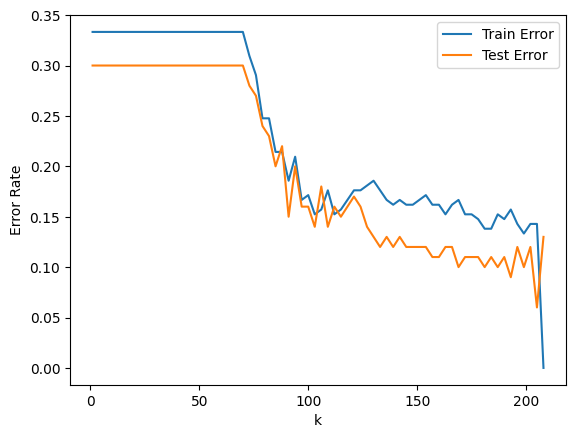

Most Suitable k_star: 4
Accuracy: 0.94
Confusion Matrix:


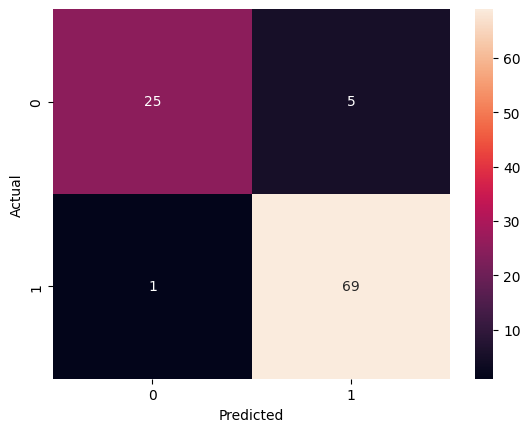

True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
F1 Score: 0.9583333333333333


In [7]:
k_values = np.arange(208, 0, -3)
train_errors = []
test_errors = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))

reverse_k_values = k_values[::-1]
plt.plot(reverse_k_values, train_errors, label='Train Error')
plt.plot(reverse_k_values, test_errors, label='Test Error')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.legend()
plt.show()



k_star = k_values[np.argmin(test_errors)]
print(f'Most Suitable k_star: {k_star}')

knn = KNeighborsClassifier(n_neighbors=k_star, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print('Confusion Matrix:')
sns.heatmap(confusion_matrix, annot=True)
plt.show()

true_positive_rate = confusion_matrix.iloc[1, 1] / confusion_matrix.iloc[1].sum()
true_negative_rate = confusion_matrix.iloc[0, 0] / confusion_matrix.iloc[0].sum()
precision = confusion_matrix.iloc[1, 1] / confusion_matrix.iloc[:, 1].sum()
f1_score = 2 * precision * true_positive_rate / (precision + true_positive_rate)
print(f'True Positive Rate: {true_positive_rate}')
print(f'True Negative Rate: {true_negative_rate}')

print(f'Precision: {precision}')
print(f'F1 Score: {f1_score}')

#### iii. Learning Curve

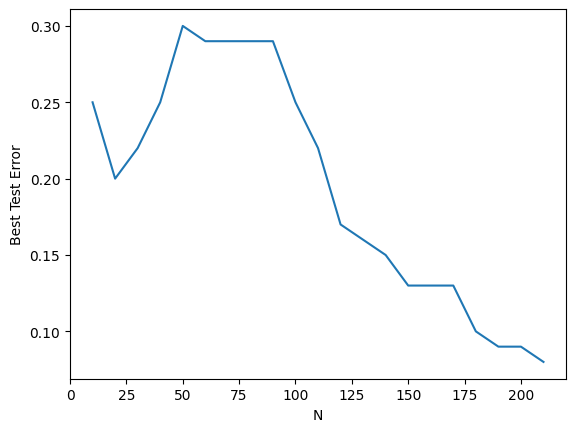

In [8]:
N_values = list(range(10, 211, 10))
best_test_errors = []
for N in N_values:
    df_class0 = df[df['class_numeric'] == 0].iloc[:N//3]
    df_class1 = df[df['class_numeric'] == 1].iloc[:N-N//3]
    df_train = pd.concat([df_class0, df_class1])
    X_train = df_train.drop(['class', 'class_numeric'], axis=1)
    y_train = df_train['class_numeric']
    k_values = list(range(1, min(N, 197), 5))
    test_errors = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train, y_train)
        y_test_pred = knn.predict(X_test)
        test_errors.append(1 - accuracy_score(y_test, y_test_pred))
    best_test_errors.append(min(test_errors))

plt.plot(N_values, best_test_errors)
plt.xlabel('N')
plt.ylabel('Best Test Error')
plt.show()


### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [9]:
k_values = list(range(1, 200, 5))

# minkowski distance
test_errors2 = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p = 1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_errors2.append(1 - accuracy_score(y_test, y_pred))

# k* for minkowski distance
k_star2 = k_values[np.argmin(test_errors2)]
print(f'Most Suitable k_star for manhattan distance: {k_star2}')
print(f'Best Test Error for manhattan distance: {min(test_errors2)}')



Most Suitable k_star for manhattan distance: 6
Best Test Error for manhattan distance: 0.10999999999999999


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [11]:
log10_p_values = np.arange(0.1, 1.1, 0.1)
best_test_error = float('inf')
best_log10_p = None
for log10_p in log10_p_values:
    p = 10 ** log10_p
    knn = KNeighborsClassifier(n_neighbors=k_star2, metric='minkowski', p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    if test_error < best_test_error:
        best_test_error = test_error
        best_log10_p = log10_p

print(f'Best log10(p): {best_log10_p}')
print(f'Best Test Error: {best_test_error}')
print('K* for minkowski distance:', k_star2)

Best log10(p): 0.6
Best Test Error: 0.06000000000000005
K* for minkowski distance: 6


##### C. Chebyshev Distance With p -> infinity.

In [12]:
# chebyshev distance
k_values = list(range(1, 200, 5))
test_errors3 = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_errors3.append(1 - accuracy_score(y_test, y_pred))

# k* for chebyshev distance
k_star3 = k_values[np.argmin(test_errors3)]
print(f'Most Suitable k_star for chebyshev distance: {k_star3}')
print(f'Best Test Error for chebyshev distance: {min(test_errors3)}')

Most Suitable k_star for chebyshev distance: 16
Best Test Error for chebyshev distance: 0.07999999999999996


#### ii. Mahalanobis Distance.

In [13]:
k_values = list(range(1, 200, 5))
test_errors4 = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': np.linalg.inv(np.cov(X_train.T))})
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_errors4.append(1 - accuracy_score(y_test, y_pred))

k_star4 = k_values[np.argmin(test_errors4)]
print(f'Most Suitable k_star for mahalanobis distance: {k_star4}')
print(f'Best Test Error for mahalanobis distance: {min(test_errors4)}')


Most Suitable k_star for mahalanobis distance: 1
Best Test Error for mahalanobis distance: 0.17000000000000004


In [14]:
test_errors_df = pd.DataFrame({
    'Euclidean': [min(test_errors), k_star],
    'Manhattan': [min(test_errors2), k_star2],
    'Minkowski': [best_test_error, k_star2],
    'Chebyshev': [min(test_errors3), k_star3],
    'Mahalanobis': [min(test_errors4), k_star4],
}, index=['Best Test Error', 'k*'])
print(test_errors_df.T)

             Best Test Error    k*
Euclidean               0.08   4.0
Manhattan               0.11   6.0
Minkowski               0.06   6.0
Chebyshev               0.08  16.0
Mahalanobis             0.17   1.0


### (e) Weighted Decision

In [15]:
k_values = np.arange(1, 200, 5)

# euclidean distance
test_errors5 = []
for k in k_values:
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    knn_euclidean.fit(X_train, y_train)
    y_pred = knn_euclidean.predict(X_test)
    test_errors5.append(1 - accuracy_score(y_test, y_pred))

# manhattan distance
test_errors6 = []
for k in k_values:
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='distance')
    knn_manhattan.fit(X_train, y_train)
    y_pred = knn_manhattan.predict(X_test)
    test_errors6.append(1 - accuracy_score(y_test, y_pred))

# chebyshev distance
test_errors7 = []
for k in k_values:
    knn_chebyshev = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', weights='distance')
    knn_chebyshev.fit(X_train, y_train)
    y_pred = knn_chebyshev.predict(X_test)
    test_errors7.append(1 - accuracy_score(y_test, y_pred))

df_errors = pd.DataFrame({
    'euclidean': [min(test_errors5), k_values[np.argmin(test_errors5)]],
    'manhattan': [min(test_errors6), k_values[np.argmin(test_errors6)]],
    'chebyshev': [min(test_errors7), k_values[np.argmin(test_errors7)]]
}, index=['best_test_error', 'k_star'])

# best_errors = df_errors.min()
# print(best_errors)
print(df_errors.T)


           best_test_error  k_star
euclidean             0.10     6.0
manhattan             0.10    26.0
chebyshev             0.11    16.0


### (f) Training Error Rate

The lowest training error rate is achieved as 0 when k = 1 because in this case the nearest neighbor is the point itself.